In [44]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [45]:
DFrame = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [46]:
DFrame.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [47]:
df = DFrame[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


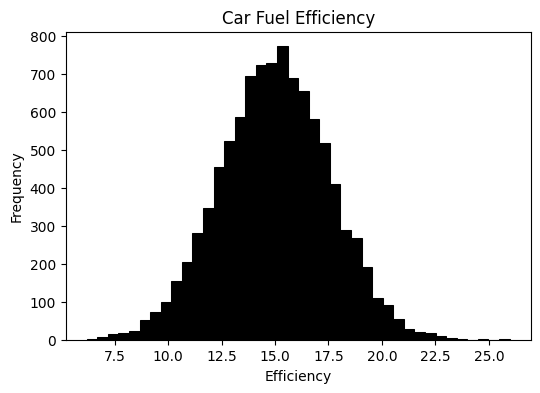

In [48]:
plt.figure(figsize=(6, 4))

sns.histplot(df.fuel_efficiency_mpg, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Efficiency')
plt.title('Car Fuel Efficiency')

plt.show()

### Look at the fuel_efficiency_mpg variable. Does it have a long tail?
Answer : No, it doesnot have a long tail.

### Question 1 There's one column with missing values. What is it?

In [49]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Answer : horsepower

### Question 2 What's the median (50% percentile) for variable 'horsepower'?

In [50]:
#int(df['horsepower'].median())
df['horsepower'].describe()

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

### Answer : 149

### Question 3 
##### We need to deal with missing values for the column from Q1.
##### We have two options: fill it with 0 or with the mean of this variable.
##### Try both options. For each, train a linear regression model without regularization using the code from the lessons.
##### For computing the mean, use the training only!
##### Use the validation dataset to evaluate the models and compare the RMSE of each option.
##### Round the RMSE scores to 2 decimal digits using round(score, 2)
##### Which option gives better RMSE?

In [51]:
np.random.seed(42)
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [52]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [53]:
base = ['engine_displacement','horsepower','vehicle_weight','model_year']

In [54]:
df_train.horsepower.mean()

np.float64(149.54476367006487)

In [55]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


def prepare_X_mean(df):
    df_num = df[base]
    df_num = df_num.fillna(149.54)
    X = df_num.values
    return X
    
#df_train_0 = df_train.fillna(0)
#df_val_0 = df_val.fillna(0)
#df_test_0 = df_test.fillna(0)

In [56]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [57]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

#### With 0

In [58]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
#y_pred = w_0 + X_train.dot(w)
#rmse(y_train, y_pred)

In [59]:
w_0, w

(np.float64(28.827365475106156),
 array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992869e-04]))

In [60]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [61]:
score_1 = rmse(y_val, y_pred)
score_1 = round(score_1, 2)
score_1

np.float64(0.52)

#### With mean

In [62]:
X_train_mean = prepare_X_mean(df_train)
w_0_m, w_m = train_linear_regression(X_train_mean, y_train)

X_val_mean = prepare_X_mean(df_val)
y_pred_mean = w_0_m + X_val_mean.dot(w_m)

In [ ]:
score_2 = rmse(y_val, y_pred_mean)
score_2 = round(score_2, 2)
score_2

np.float64(0.46)

### Answer : Mean gives better rmse value

### Question 4 
##### Now let's train a regularized linear regression.
##### For this question, fill the NAs with 0.
##### Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
##### Use RMSE to evaluate the model on the validation dataset.
##### Round the RMSE scores to 2 decimal digits.
##### Which r gives the best RMSE?

In [67]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [69]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%s' %r, round(rmse(y_val, y_pred),2))

0 0.52
0.01 0.52
0.1 0.52
1 0.52
5 0.52
10 0.52
100 0.52


### Answer : 0.01

### Question 5 
##### We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
##### Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
##### For each seed, do the train/validation/test split with 60%/20%/20% distribution.
##### Fill the missing values with 0 and train a model without regularization.
##### For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
##### What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
##### Round the result to 3 decimal digits (round(std, 3))

In [90]:
results = {}
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for i in seeds:
    np.random.seed(i)
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    results[i] = {"train" : df_train, "val" : df_val, "test" : df_test,
                 "y_train" : y_train, "y_val" : y_val, "y_test" : y_test}
    

In [93]:
results[1]['y_train']

array([15.86594878, 17.88596479, 10.88270071, ..., 20.33305536,
       11.73612509, 18.31302256], shape=(5824,))

In [94]:
res = []
for seed in results:
    
    df_train = results[seed]['train']
    df_val = results[seed]['val']
    y_train = results[seed]['y_train']
    y_val = results[seed]['y_val']
    
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    res.append(rmse(y_val, y_pred))

In [96]:
np.std(res)

np.float64(0.006989446425721602)

### Answer : 0.006

### Question 6 
##### Split the dataset like previously, use seed 9.
##### Combine train and validation datasets.
##### Fill the missing values with 0 and train a model with r=0.001.
##### What's the RMSE on the test dataset?

In [97]:
df_train_9 = results[9]['train']
df_val_9 = results[9]['val']
df_test_9 = results[9]['test']
y_train_9 = results[9]['y_train']
y_val_9 = results[9]['y_val']
y_test_9 = results[9]['y_test']

In [100]:
df_train_9.shape

(5824, 4)

In [101]:
df_val_9.shape

(1940, 4)

In [108]:
df_full_train = pd.concat([df_train_9,df_val_9])
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = np.concatenate([y_train_9,y_val_9])

In [109]:
y_full_train

array([10.30469994, 13.47943378, 16.19065297, ..., 13.67814034,
       17.59323665, 16.06897494], shape=(7764,))

In [112]:
X_full_train = prepare_X(df_full_train)
w_0, w = train_linear_regression_reg(X_full_train, y_full_train,0.001)
X_test = prepare_X(df_test_9)
y_pred = w_0 + X_test.dot(w)

In [113]:
score = rmse(y_test_9,y_pred)
score

np.float64(0.5156261299167999)

### Answer : 0.515